## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading data to a dataframe
temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/housing.csv')

In [ ]:
#shape of the df
temp_df.shape

(505, 1)

In [ ]:
temp_df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


Shape making no sense. It has only single column. We need to split them and store in another df

In [ ]:
#defining empty dataframe with given columns
df = pd.DataFrame(columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df.shape

(0, 14)

In [ ]:
#adding first row to df
first_row = dict(zip(df.columns,list(map(float,temp_df.columns[0].split()))))
df = df.append(first_row, ignore_index = True)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [ ]:
#adding remaining rows to the df
for i in range(temp_df.shape[0]):
  df.loc[i+1] = list(map(float,temp_df.iat[i,0].split()))

In [ ]:
#sense check with shape
df.shape

(506, 14)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#CHAS is categorical variable
df['CHAS']=df['CHAS'].astype(object)

In [ ]:
target = 'MEDV'
independent = list(set(df.columns)-set(target))

In [ ]:
#Splitting the data
X = df[independent]
y = df[target]

In [ ]:
X.head()

,B,CHAS,CRIM,LSTAT,ZN,PTRATIO,INDUS,TAX,MEDV,RAD,DIS,NOX,AGE,RM
0,396.90,0,0.00632,4.98,18.0,15.3,2.31,296.0,24.0,1.0,4.0900,0.538,65.2,6.575
1,396.90,0,0.02731,9.14,0.0,17.8,7.07,242.0,21.6,2.0,4.9671,0.469,78.9,6.421
2,392.83,0,0.02729,4.03,0.0,17.8,7.07,242.0,34.7,2.0,4.9671,0.469,61.1,7.185
3,394.63,0,0.03237,2.94,0.0,18.7,2.18,222.0,33.4,3.0,6.0622,0.458,45.8,6.998
4,396.90,0,0.06905,5.33,0.0,18.7,2.18,222.0,36.2,3.0,6.0622,0.458,54.2,7.147


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
#Splitting into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)

In [ ]:
print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))

0.9996866695362723
0.9987643127505805


In [ ]:
y_pred = DT_reg.predict(X_test)

In [ ]:
y_pred

array([22.40625   , 50.        , 23.06190476,  8.4625    , 21.29230769,
       20.1       , 20.63529412, 19.075     , 16.18571429, 18.45714286,
        8.4625    , 17.45      , 14.9625    , 10.34      , 50.        ,
       28.75714286, 23.06190476, 33.08      , 29.725     , 21.29230769,
       23.82307692, 19.075     , 20.63529412, 28.75714286, 19.075     ,
       23.06190476, 19.5375    , 19.5375    , 37.4       , 19.075     ,
       14.9625    , 20.1       , 20.63529412, 20.1       , 23.82307692,
       16.71428571,  6.3       , 50.        , 14.21666667, 13.50769231,
       23.82307692, 20.1       , 19.5375    , 13.50769231, 16.71428571,
       21.29230769, 20.1       , 16.71428571, 11.92857143, 27.24      ,
       15.51428571, 23.06190476, 24.36153846, 41.7       , 15.51428571,
       21.88235294, 16.71428571, 17.45      , 14.9625    , 21.88235294,
       18.45714286, 21.29230769, 33.08      , 31.73333333, 20.1       ,
       29.725     , 14.9625    , 14.9625    , 27.24      , 22.40

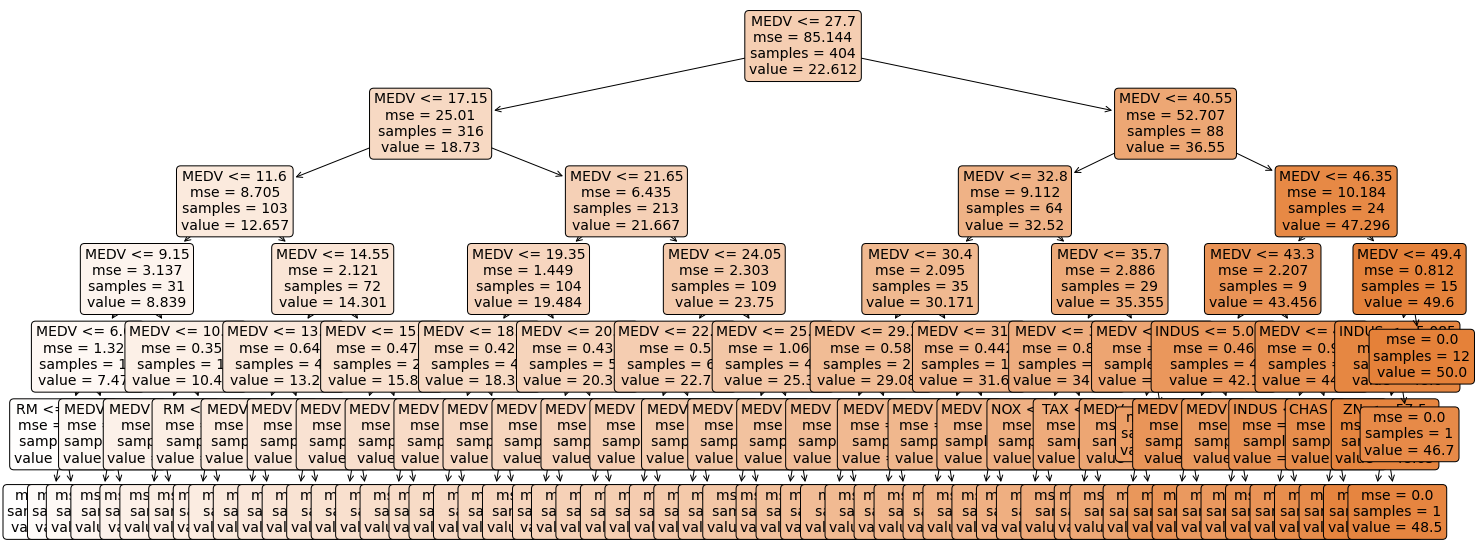

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [ ]:
#Evaluation metrics of Regression
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.10062008388891534
MAE : 0.2117662136498643
RMSE : 0.31720668953998327
R2 : 0.9987643127505805
Adjusted R2 :  0.998565466526536


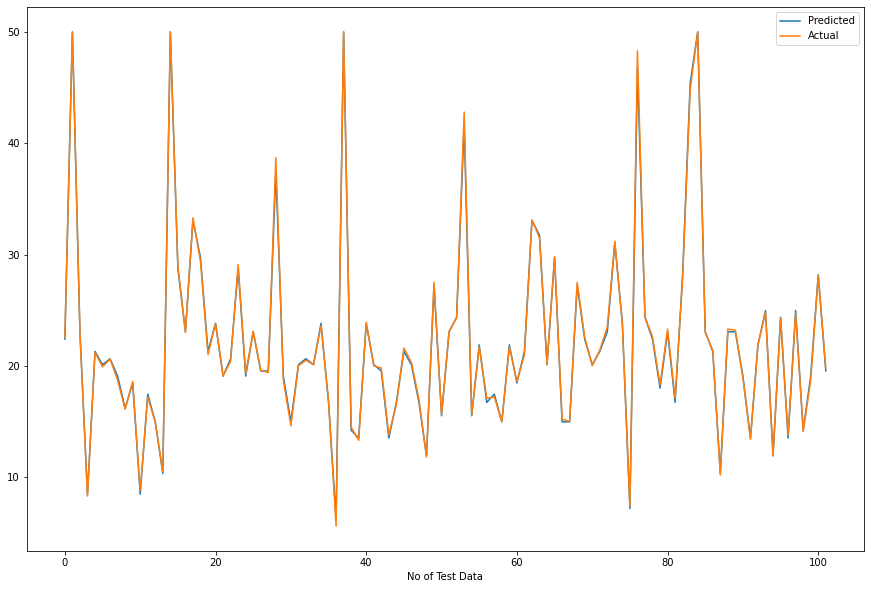

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

* Our model fitted very well
* It is predicting with 99% accuracy on test data as well